<a href="https://colab.research.google.com/github/nandasimatupang/skripsoy/blob/main/codingan/klasifikasi_sentimen_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# Load data
df = pd.read_csv("pantai_terlabeli.csv")

In [ ]:
df["sentiment"] = df["sentiment"].map({'Positive':1,'Negative':0})

<Axes: ylabel='count'>

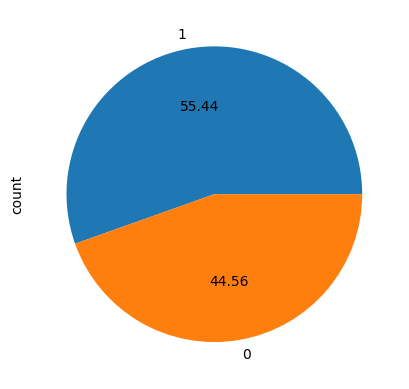

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (1603, 6)
Validation data shape: (200, 6)
Test data shape: (201, 6)


In [ ]:
df_train.to_csv('data_training.csv', index = False)
data = pd.read_csv('data_training.csv')
data.head()

,Unnamed: 0,user,waktu,ulasan,sentiment,aspect
0,562,Dio Sebastian Palungan,setahun lalu,Mines di akses masuk rusak batu2 ga ada perbai...,0,Akses
1,709,Mohammad Irwansyah,2 bulan lalu,Lumayan bagus,1,Pemandangan
2,423,Munir Ogie,setahun lalu,Pantainya indah sekali yg ada di kabupaten mal...,1,Pemandangan
3,109,Didik Sunaryo,setahun lalu,PANTAI SEJUK DAN NYAMAN SERTA MEMBIKIN HATI SE...,1,Pemandangan
4,1384,Nura Putri,10 bulan lalu,Pemandangan yang santai bagus dan seperti kaya...,1,Pemandangan


In [ ]:
df_val.to_csv('data_validasi.csv', index = False)
data = pd.read_csv('data_validasi.csv')
data.head()

,Unnamed: 0,user,waktu,ulasan,sentiment,aspect
0,702,Gatra Orbita Digitalis,sebulan lalu,Salah satu DTW di Tuban dengan atraksi utama p...,1,Fasilitas
1,825,Yulii Queen,7 bulan lalu,"Overall oke, satu doang bikin ga nyaman bnyak ...",0,Kebersihan
2,647,Dina Inayati,2 tahun lalu,+Bagus.\n+Dapat 2 view di satu pantai\n+Bisa c...,1,Fasilitas
3,1563,Cak Nunu,setahun lalu,Sayang jalan menuju Balekambang banyak yang ru...,0,Akses
4,1872,RICCI RICARDO SUTRISNO,setahun lalu,"Pantai yg bagus, bersih dan nyaman sayang seka...",0,Harga


In [ ]:
df_test.to_csv('data_testing.csv', index = False)

data = pd.read_csv('data_testing.csv')
data.head()

,Unnamed: 0,user,waktu,ulasan,sentiment,aspect
0,518,yolla destiara,setahun lalu,Pantainya bagus; cuma ada banyak sampah nyaa h...,0,Kebersihan
1,784,Lusi,5 bulan lalu,Pantainya viewnya cukup bagus. Bisa menikmati ...,1,Harga
2,1215,Arsadono Setiarso,7 bulan lalu,Sekarang lebih mudah transportasi dari Malang ...,1,Akses
3,602,Thalia Soetantyo,setahun lalu,Pemandangannya bagus! kalau dilihat dari tempa...,1,Pemandangan
4,876,Dita Iny,9 bulan lalu,bersih. nyaman untuk liburan akhir pekan.,1,Kebersihan


In [ ]:
#Modelling
!pip install transformers

In [ ]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))

Panjang vocabulary: 30521


In [ ]:
# Example of Tokenization
# Retrieve the 1st index data on the dataframe
print('Kalimat:', df['ulasan'][11])
print('BERT Tokenizer:', bert_tokenizer.tokenize(df['ulasan'][11]))

Kalimat: Direkomendasikan untuk mendapat pengalaman baru di Pacitan. Namun harap tetap menjaga kebersihan di setiap fasilitas umum. Salam Pariwisata. Terima kasih
BERT Tokenizer: ['direk', '##omendasikan', 'untuk', 'mendapat', 'pengalaman', 'baru', 'di', 'pacitan', '.', 'namun', 'harap', 'tetap', 'menjaga', 'kebersihan', 'di', 'setiap', 'fasilitas', 'umum', '.', 'salam', 'pariwisata', '.', 'terima', 'kasih']


Text(0.5, 0, 'Token count')

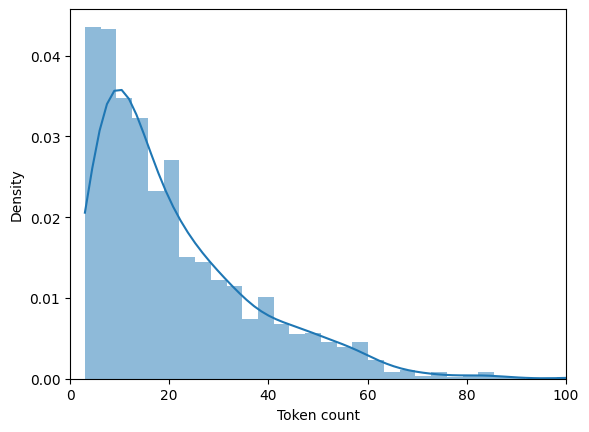

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# There are many ways to define max_length
# The intuition is that we don't want to cut sentences
# Or added too much padding (longer computation)

# In this example, max_length is determined from the distribution of tokens in the dataset
token_lens = []
for txt in df['ulasan']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count')

In [ ]:

# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [ ]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
df_train = df_train[['ulasan','sentiment']]

In [ ]:
df_test= df_test[['ulasan','sentiment']]

In [ ]:
df_val= df_val[['ulasan','sentiment']]

In [ ]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p2', num_labels=2)

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=15,
                              batch_size=32, validation_data=val_encoded)

Epoch 1/15


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
51/51 [==============================] - 126s 582ms/step - loss: 0.2957 - accuracy: 0.8684 - val_loss: 0.1618 - val_accuracy: 0.9250
Epoch 2/15
51/51 [==============================] - 15s 295ms/step - loss: 0.1079 - accuracy: 0.9663 - val_loss: 0.1411 - val_accuracy: 0.9550
Epoch 3/15
51/51 [==============================] - 14s 281ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.2355 - val_accuracy: 0.9200
Epoch 4/15
51/51 [==============================] - 14s 281ms/step - loss: 0.0475 - accuracy: 0.9869 - val_loss: 0.1449 - val_accuracy: 0.9550
Epoch 5/15
51/51 [==============================] - 15s 284ms/step - loss: 0.0467 - accuracy: 0.9888 - val_loss: 0.1258 - val_accuracy: 0.9750
Epoch 6/15
51/51 [==============================] - 15s 289ms/step - loss: 0.0447 - accuracy: 0.9844 - val_loss: 0.1338 - val_accuracy: 0.9550
Epoch 7/15
51/

In [ ]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

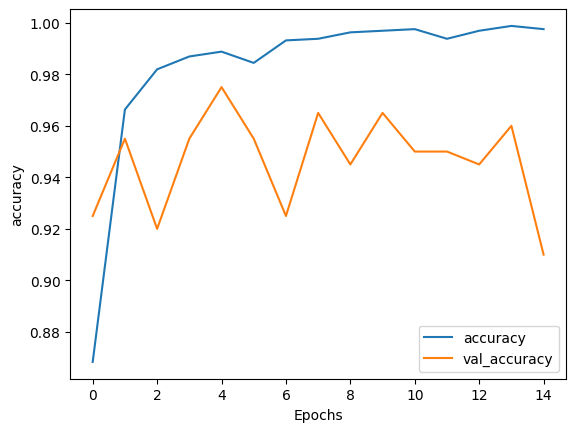

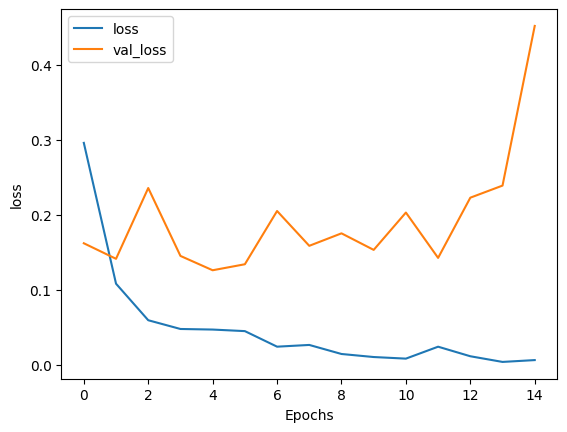

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
bert_model.save_weights('klasifikasi_sentimen.h5')

In [ ]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

7/7 [==============================] - 1s 98ms/step - loss: 0.4755 - accuracy: 0.9204
Test Accuracy: 0.9203979969024658
CPU times: user 360 ms, sys: 54.9 ms, total: 415 ms
Wall time: 1.29 s


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

7/7 [==============================] - 10s 89ms/step


In [ ]:
import numpy as np

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['sentiment'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.9203980099502488

In [ ]:
confusion_matrix(y_true, y_pred)

array([[90,  3],
       [13, 95]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        93
           1       0.97      0.88      0.92       108

    accuracy                           0.92       201
   macro avg       0.92      0.92      0.92       201
weighted avg       0.93      0.92      0.92       201



In [ ]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=2)
bert_load_model.load_weights('klasifikasi_sentimen.h5')


# Sample text
input_text = 'saya batuk dan nyeri dada'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')


# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

sentiment_labels = ['Negative', 'Positive']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

print(input_text, ':', sentiment_labels[label[0]])

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


saya batuk dan nyeri dada : Negative


In [ ]:
%%time
input_text = 'jelek ya pantainya'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')


# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

sentiment_labels = ['negative', 'postif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

print(input_text, ':', sentiment_labels[label[0]])

jelek ya pantainya : negative
CPU times: user 254 ms, sys: 6.14 ms, total: 261 ms
Wall time: 385 ms


In [ ]:
# Function to predict the aspect of a single review
def predict_aspect(review):
    input_text_tokenized = bert_tokenizer.encode(review,
                                                 truncation=True,
                                                 padding='max_length',
                                                 return_tensors='tf')
    bert_predict = bert_model(input_text_tokenized)
    bert_output_probabilities = tf.nn.softmax(bert_predict[0], axis=-1)
    label_index = tf.argmax(bert_output_probabilities, axis=1).numpy()[0]
    label_probability = bert_output_probabilities.numpy()[0][label_index]
    aspect_label = sentiment_labels[label_index]
    return aspect_label, label_probability

# Read the CSV file
input_csv = 'semua_data.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv)

In [ ]:
df

,Unnamed: 0,user,ulasan
0,0,Didit lugmana,"Pantai bagus, banyak penginapan, orangnya rama..."
1,1,Candra Widarusanto,"Pantai nya sebetulnya bagus, cuma akses jalan ..."
2,2,Gaguk Amin,Keren
3,3,RICO PRASETIAWAN,Rame kalau wekend
4,4,NINDYA ADITA,Ikon utama yg menarik pengunjung adalah Purany...
...,...,...,...
12000,470,Wahyu Yani,"Pasirnya putih,ombaknya bersahabat wktu itu q ..."
12001,471,Laila 1,pas untuk santai
12002,472,anwar s,"Pantainya bersih, jalur menuju pantai baik."
12003,473,Dedy Dinata,Tempatnya bersih dan banyak lokasi selfie.


In [ ]:
# Make predictions for each review in the 'ulasan' column
df['sentimen'] = df['ulasan'].apply(lambda x: predict_aspect(x)[0])

In [ ]:
df

,Unnamed: 0,user,ulasan,sentimen
0,0,Didit lugmana,"Pantai bagus, banyak penginapan, orangnya rama...",negative
1,1,Candra Widarusanto,"Pantai nya sebetulnya bagus, cuma akses jalan ...",negative
2,2,Gaguk Amin,Keren,postif
3,3,RICO PRASETIAWAN,Rame kalau wekend,postif
4,4,NINDYA ADITA,Ikon utama yg menarik pengunjung adalah Purany...,postif
...,...,...,...,...
12000,470,Wahyu Yani,"Pasirnya putih,ombaknya bersahabat wktu itu q ...",negative
12001,471,Laila 1,pas untuk santai,negative
12002,472,anwar s,"Pantainya bersih, jalur menuju pantai baik.",postif
12003,473,Dedy Dinata,Tempatnya bersih dan banyak lokasi selfie.,postif


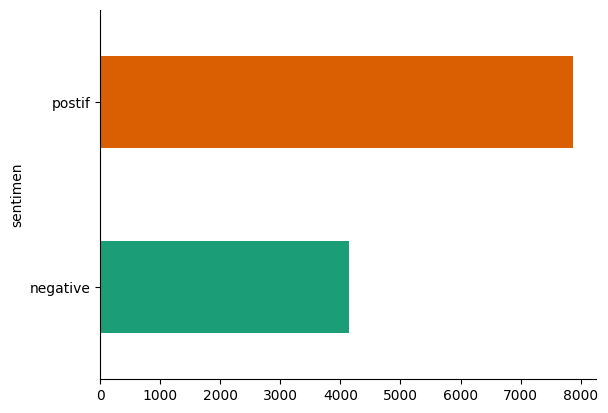

In [ ]:
# @title sentimen

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.to_csv('semua_data_terlabeli_sentimen.csv')